In [43]:
from mesa import Agent, Model
import random
from mesa.time import RandomActivation

######## Model Control ##########
class NitroShedModel(Model):
    """A model with some number of farmer agents."""
    
    """Initialize the model and create the agents"""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = FarmerAgent(i, self)
            self.schedule.add(a)
            
    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

        
##### Farmer Agent ##############
class FarmerAgent(Agent):
    """ A Farmer Agent with initial amount of captial and a unique ID"""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)  #### Super class  used for creating agents from Model Control####
        self.capital = random.randint(500,1000)
        self.unique_id=unique_id+1
        print("Farmer:",self.unique_id, "Capital:", self.capital)

    def step(self):
        if self.capital == 0:
            return
        other_agent = random.choice(self.model.schedule.agents)
        other_agent.capital += 100
        self.capital -= 100



Farmer: 1 Capital: 790
Farmer: 2 Capital: 848
Farmer: 3 Capital: 721
Farmer: 4 Capital: 956
Farmer: 5 Capital: 972
Farmer: 6 Capital: 832
Farmer: 7 Capital: 909
Farmer: 8 Capital: 964
Farmer: 9 Capital: 740
Farmer: 10 Capital: 981


(array([2., 0., 1., 0., 2., 0., 0., 1., 0., 4.]),
 array([721., 747., 773., 799., 825., 851., 877., 903., 929., 955., 981.]),
 <a list of 10 Patch objects>)

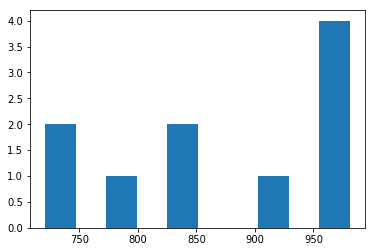

In [52]:
model = NitroShedModel(10)
#model.step()
farmer_capital = [a.capital for a in model.schedule.agents]
plt.hist(farmer_capital)

Farmer: 1 Capital: 577
Farmer: 2 Capital: 660
Farmer: 3 Capital: 610
Farmer: 4 Capital: 692
Farmer: 5 Capital: 511
Farmer: 6 Capital: 759
Farmer: 7 Capital: 880
Farmer: 8 Capital: 654
Farmer: 9 Capital: 925
Farmer: 10 Capital: 656


(array([2., 0., 0., 2., 0., 0., 1., 2., 1., 2.]),
 array([ 160.,  252.,  344.,  436.,  528.,  620.,  712.,  804.,  896.,
         988., 1080.]),
 <a list of 10 Patch objects>)

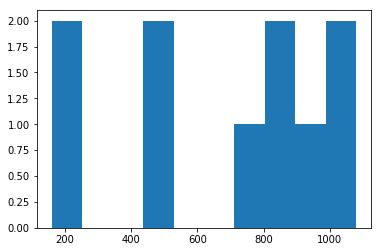

In [53]:
import matplotlib.pyplot as plt
model = NitroShedModel(10)
for i in range(10):
    model.step()
    

farmer_capital = [a.capital for a in model.schedule.agents]
plt.hist(farmer_capital)

Farmer: 1 Capital: 585
Farmer: 2 Capital: 608
Farmer: 3 Capital: 645
Farmer: 4 Capital: 879
Farmer: 5 Capital: 897
Farmer: 6 Capital: 563
Farmer: 7 Capital: 840
Farmer: 8 Capital: 678
Farmer: 9 Capital: 640
Farmer: 10 Capital: 934
Farmer: 1 Capital: 820
Farmer: 2 Capital: 806
Farmer: 3 Capital: 646
Farmer: 4 Capital: 789
Farmer: 5 Capital: 657
Farmer: 6 Capital: 656
Farmer: 7 Capital: 866
Farmer: 8 Capital: 810
Farmer: 9 Capital: 511
Farmer: 10 Capital: 634
Farmer: 1 Capital: 580
Farmer: 2 Capital: 922
Farmer: 3 Capital: 953
Farmer: 4 Capital: 855
Farmer: 5 Capital: 760
Farmer: 6 Capital: 691
Farmer: 7 Capital: 822
Farmer: 8 Capital: 789
Farmer: 9 Capital: 609
Farmer: 10 Capital: 657
Farmer: 1 Capital: 801
Farmer: 2 Capital: 839
Farmer: 3 Capital: 658
Farmer: 4 Capital: 727
Farmer: 5 Capital: 706
Farmer: 6 Capital: 888
Farmer: 7 Capital: 794
Farmer: 8 Capital: 965
Farmer: 9 Capital: 763
Farmer: 10 Capital: 901
Farmer: 1 Capital: 570
Farmer: 2 Capital: 671
Farmer: 3 Capital: 895
Farmer:

(array([0., 0., 0., ..., 0., 0., 3.]),
 array([   0,    1,    2, ..., 1963, 1964, 1965]),
 <a list of 1965 Patch objects>)

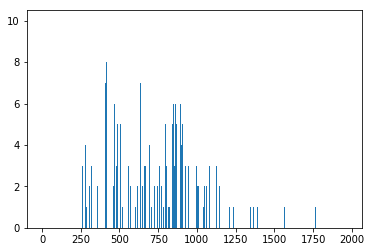

In [54]:
#run.py
import matplotlib.pyplot as plt

all_capital = []
for j in range(10):
    model = NitroShedModel(10)
    for i in range(10):
        model.step()
        
        for agent in model.schedule.agents:
            all_capital.append(agent.capital)
    
plt.hist(all_capital, bins=range(max(all_capital)+1))